Shauna Smith

Bellevue University -DSC630

Professor: Andrew Hua

Week 8 "Time Series Modeling"

<u> Objective </u>

Plot the data with proper labeling and make some observations on the graph.

Split this data into a training and test set. 
Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

Use the training set to build a predictive model for the monthly retail sales.

Use the model to predict the monthly retail sales on the last year of data.

Report the RMSE of the model predictions on the test set.

In [1]:
#importing the dataset
import pandas as pd

In [249]:
df=pd.read_excel(r"C:\Users\Shaun\OneDrive\Documents\DSC630\us_retail_sales.xlsx")

In [149]:
#Checking df
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
#familiarize
df.shape

(30, 13)

In [151]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000
mean,2006.500000,304803.833333,305200.900000,307533.566667,306719.600000,309205.633333,311406.966667,304375.448276,305451.965517,306078.206897,307310.62069,307794.896552,308099.620690
std,8.803408,97687.399232,96682.043053,100002.422696,98207.161171,99541.010078,101057.212178,92471.103673,92504.808195,93008.417392,92836.64419,92702.551770,91784.061634
min,1992.000000,146925.000000,147223.000000,146805.000000,148032.000000,149010.000000,149800.000000,150761.000000,151067.000000,152588.000000,153521.00000,153583.000000,155614.000000
25%,1999.250000,228856.750000,231470.750000,233019.000000,233235.500000,234976.500000,235967.250000,233948.000000,236566.000000,237481.000000,237553.00000,240544.000000,245485.000000
50%,2006.500000,303486.000000,304592.500000,308655.500000,311233.500000,308690.000000,312957.000000,313520.000000,310046.000000,310673.000000,310479.00000,306675.000000,308413.000000
75%,2013.750000,371527.000000,377008.500000,379221.000000,376797.500000,382698.250000,383839.750000,373554.000000,372489.000000,372505.000000,373663.00000,373914.000000,377032.000000
max,2021.000000,520162.000000,504458.000000,559871.000000,562269.000000,548987.000000,550782.000000,481627.000000,483716.000000,493327.000000,493991.00000,488652.000000,484782.000000


In [152]:
#Plot the data with proper labeling and make some observations on the graph.

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
#correlation review
correl=df.corr()

Text(0.5, 1.0, 'Correlation of U.S. Retail Sales by Time Series')

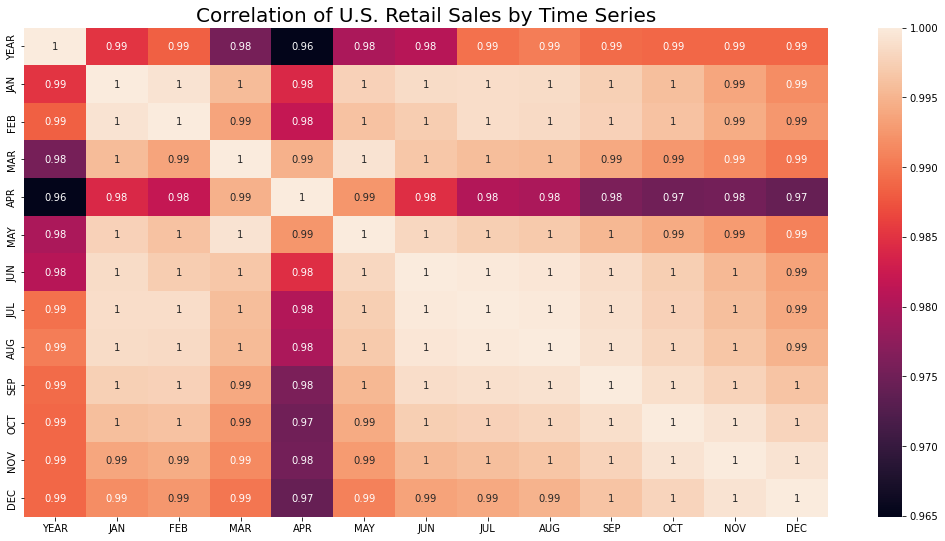

In [39]:
#create heatmap
plt.figure(figsize=(18,9))
sns.heatmap(correl, annot=True)
plt.title("Correlation of U.S. Retail Sales by Time Series", fontsize=20)

Text(0.5, 1.0, 'Pairplot of U.S. Retail Sales')

<Figure size 1296x648 with 0 Axes>

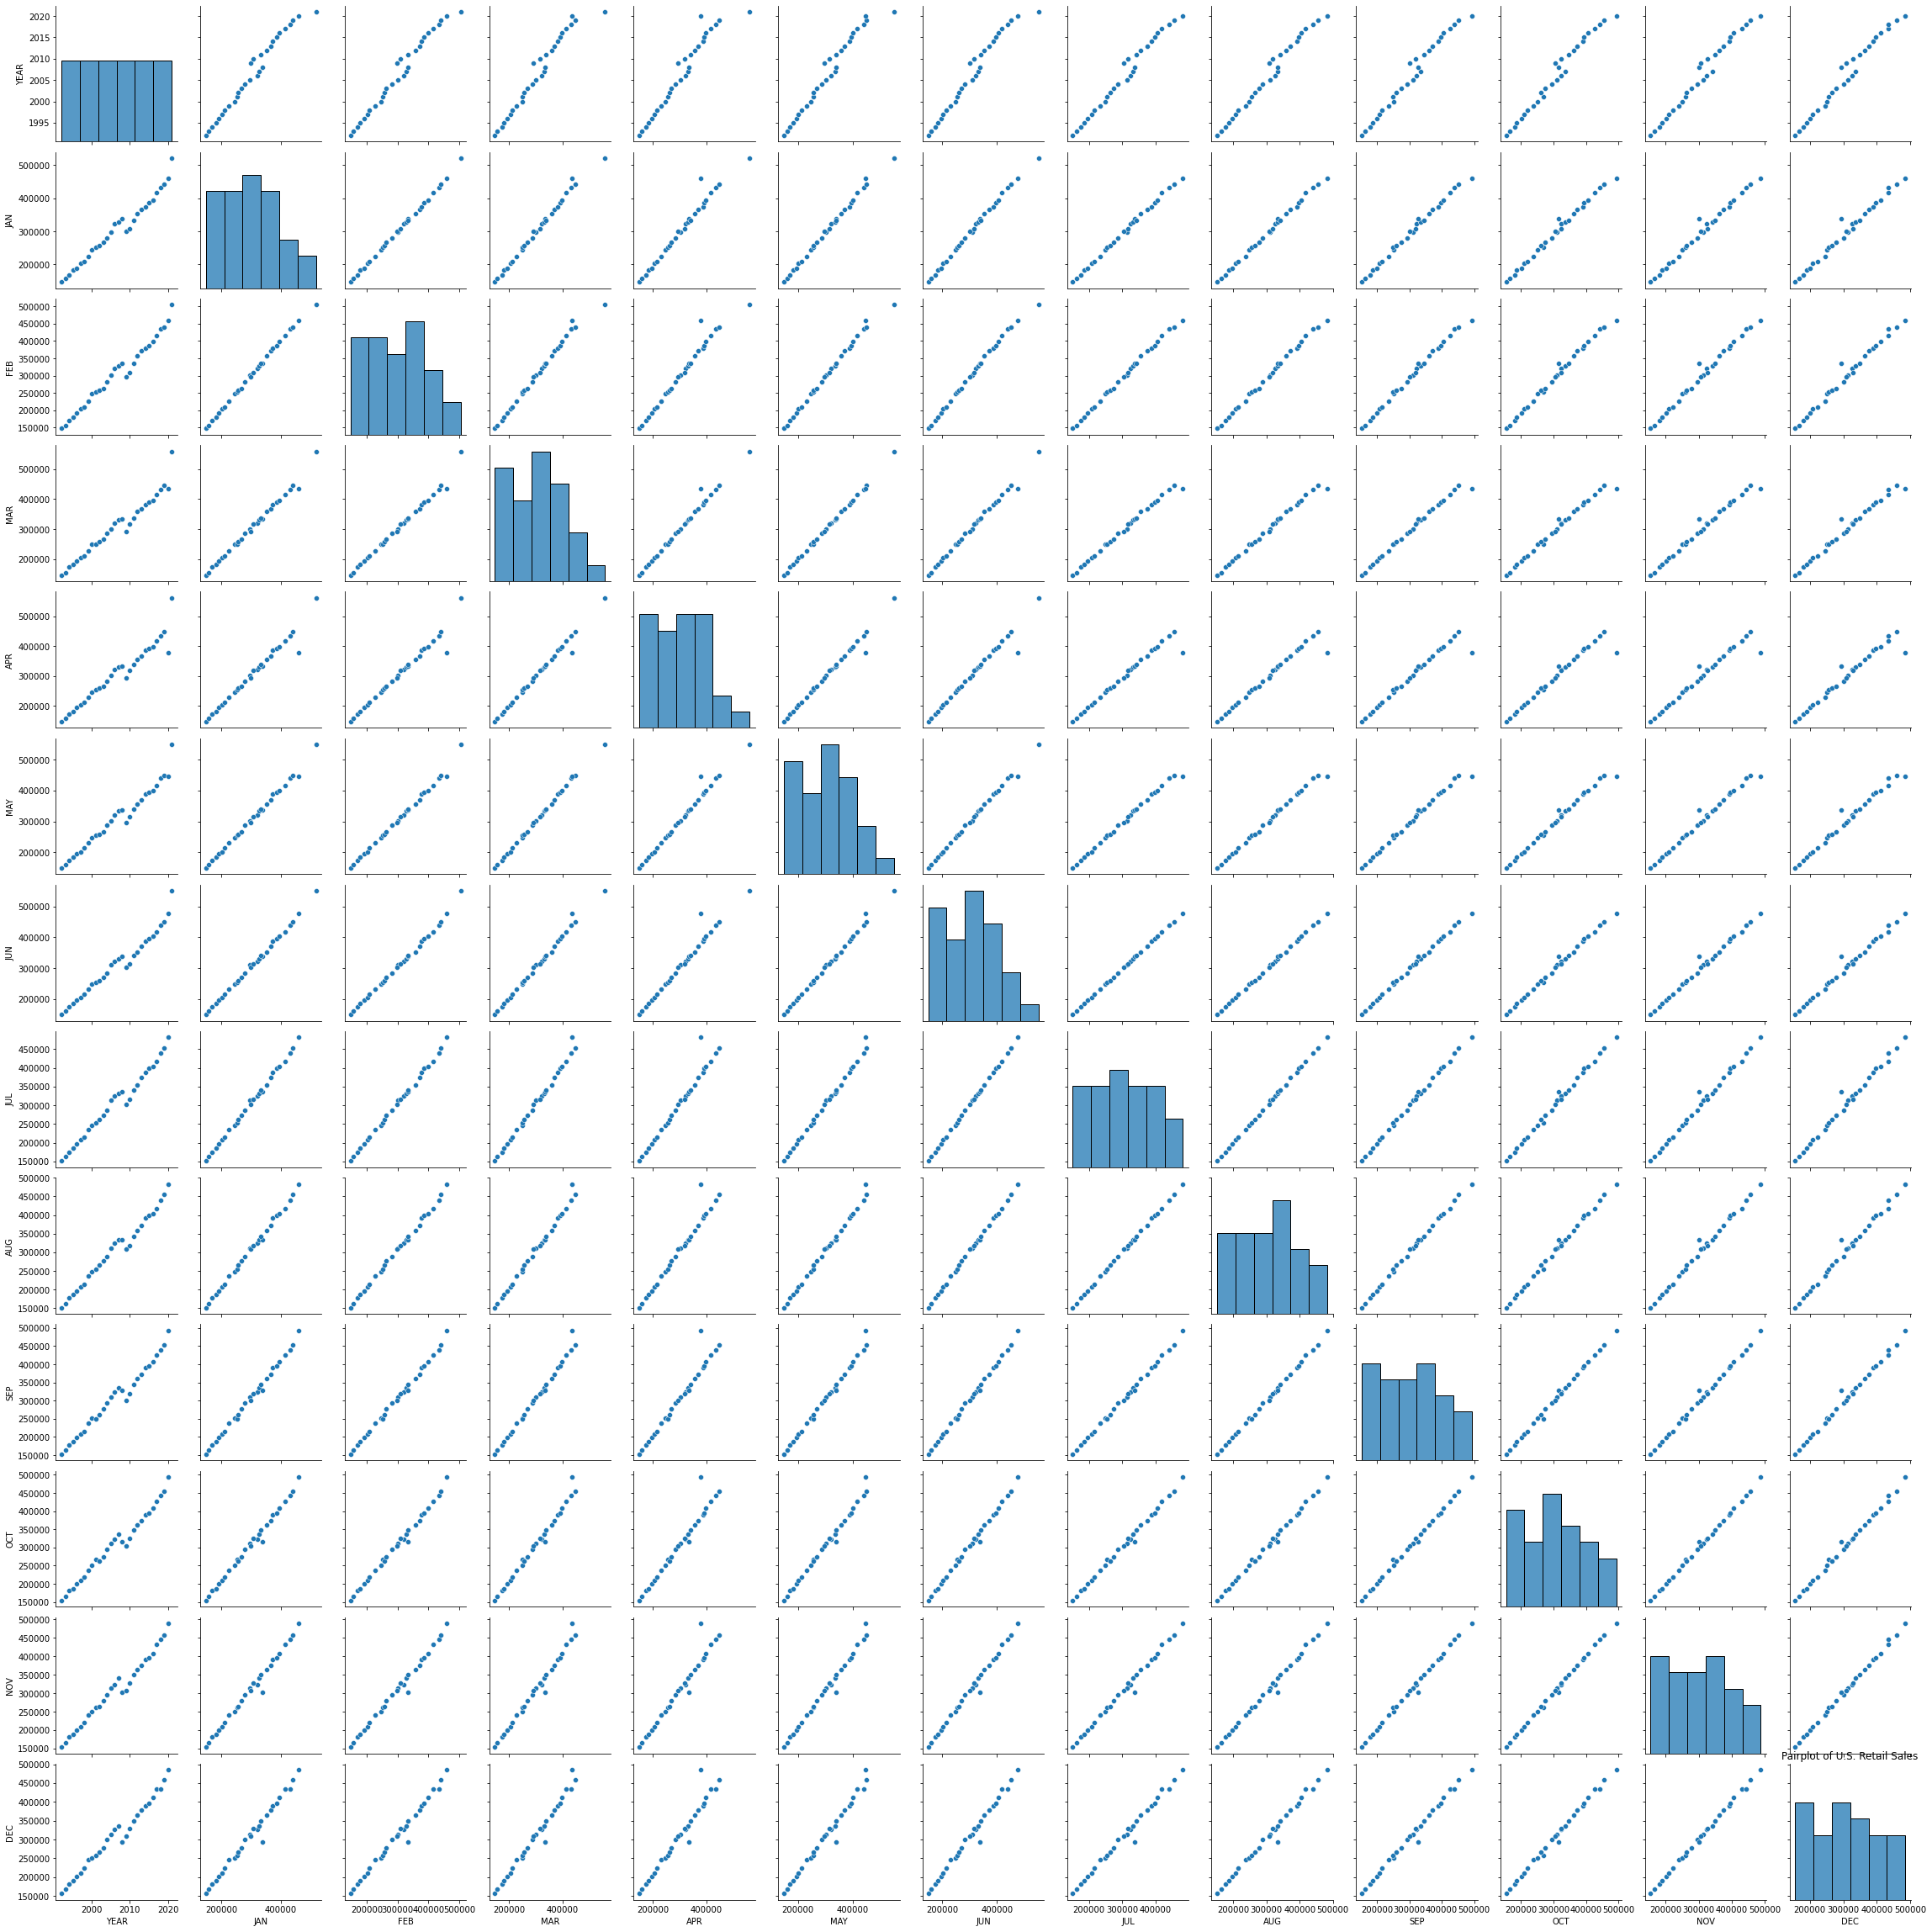

In [40]:
#create pairplot
plt.figure(figsize=(18,9))
sns.pairplot(df)
plt.title("Pairplot of U.S. Retail Sales")

Text(0.5, 1.0, 'June and July sales by years available')

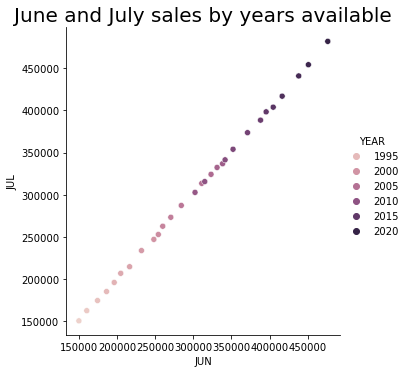

In [155]:
#Review of available JUNE and JULY by YEAR
sns.relplot(x='JUN', y='JUL', hue='YEAR', data=df)
plt.title("June and July sales by years available", fontsize=20)

In [50]:
#Begin the process to split the data for model.
import numpy as np

In [182]:
df.tail(3)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#seperate values of interest for proposed test set
vOI20=df.loc[28,['YEAR','JUL','AUG','SEP','OCT','NOV','DEC']]
vOI21=df.loc[29,['YEAR','JAN','FEB','MAR','APR','MAY','JUN']]

In [159]:
#Checking values 2020
df20=pd.DataFrame(vOI20)
df20=df20.T

In [160]:
#checking values 2021
df21=pd.DataFrame(vOI21)
df21=df21.T

In [166]:
#combining into 1 set of complete values for a full picture of predictive test set range.
hmm=pd.merge(df20, df21, on = "YEAR", how = "outer")
hmm

,YEAR,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,MAR,APR,MAY,JUN
0,2020.0,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,520162.0,504458.0,559871.0,562269.0,548987.0,550782.0


In [250]:
#configure the df values to a new 'Sales' column and index by 'Date'
df.set_index('YEAR', inplace=True)

In [251]:
df.tail(3)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# Prepping the dataframe for SARIMA
tink=df.stack

In [253]:
tinker=pd.DataFrame({'Sales':df.stack()})
tinker

Sales
YEAR              
1992 JAN  146925.0
     FEB  147223.0
     MAR  146805.0
     APR  148032.0
     MAY  149010.0
...            ...
2021 FEB  504458.0
     MAR  559871.0
     APR  562269.0
     MAY  548987.0
     JUN  550782.0

[354 rows x 1 columns]

In [254]:
tinkere=tinker.reset_index()

In [255]:
tinkere.rename(columns={'level_1':'Month'}, inplace=True)

In [256]:
tinkere.head(3)

,YEAR,Month,Sales
0,1992,JAN,146925.0
1,1992,FEB,147223.0
2,1992,MAR,146805.0


In [257]:
#Converting to datetime
tinkere['Date'] = pd.to_datetime(tinkere.YEAR.astype(str) + '/' + tinkere.Month.astype(str) + '/01')

In [258]:
tinkere.head(2)

,YEAR,Month,Sales,Date
0,1992,JAN,146925.0,1992-01-01
1,1992,FEB,147223.0,1992-02-01


In [265]:
tinkeri=tinkere.drop(['YEAR','Month'], axis=1)
tinkeri.tail()

,Sales,Date
349,504458.0,2021-02-01
350,559871.0,2021-03-01
351,562269.0,2021-04-01
352,548987.0,2021-05-01
353,550782.0,2021-06-01


In [266]:
tinkeri.set_index('Date', inplace=True)

In [271]:
#Final working DF for SARIMA
tinkered=tinkeri
#Showing the test set value ranges for iloc
tinkered.tail(12)

,Sales
Date,
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0
2020-12-01,484782.0
2021-01-01,520162.0
2021-02-01,504458.0
2021-03-01,559871.0


In [272]:
#Split this data into a training and test set. 
#Use the last year of data (July 2020 – June 2021) as your test set and the rest as your training set
training=tinkered.iloc[:-12,:]
test=tinkered.iloc[-12:,:]

In [273]:
training.shape,test.shape

((342, 1), (12, 1))

In [274]:
#Confirmed ranges
test

,Sales
Date,
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0
2020-12-01,484782.0
2021-01-01,520162.0
2021-02-01,504458.0
2021-03-01,559871.0


In [275]:
#Use the training set to build a predictive model for the monthly retail sales.
!pip install pmdarima

In [276]:
from pmdarima import auto_arima

In [277]:
#SARIMA Model
model=auto_arima(y=training.Sales, m=7)

In [280]:
#Predictions 
predictions=pd.Series(model.predict(n_periods=len(test)))
predictions.index=test.index


In [281]:
predictions

Date
2020-07-01    468850.619119
2020-08-01    466542.141878
2020-09-01    467507.165180
2020-10-01    468417.777849
2020-11-01    469234.406228
2020-12-01    470439.331724
2021-01-01    471531.868987
2021-02-01    472492.534026
2021-03-01    473468.272628
2021-04-01    474474.955092
2021-05-01    475514.137938
2021-06-01    476609.459177
dtype: float64

<AxesSubplot:xlabel='Date'>

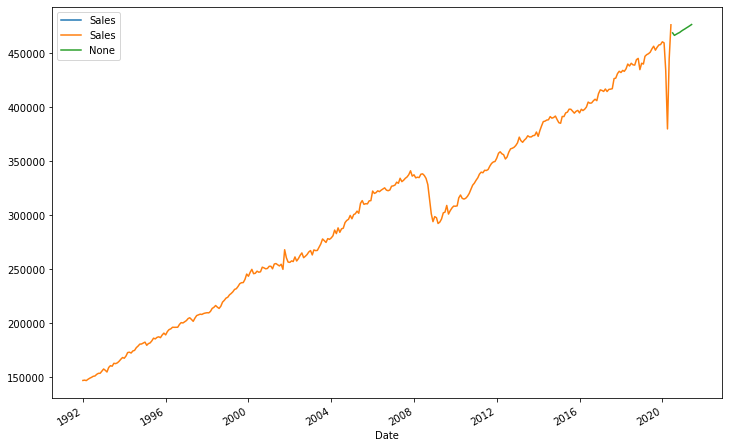

In [308]:
#Visualize
training['Sales']['2020-07-01':].plot(figsize=(12,8),legend=True)
training['Sales'].plot(legend=True)
predictions.plot(legend=True)

<AxesSubplot:xlabel='Date'>

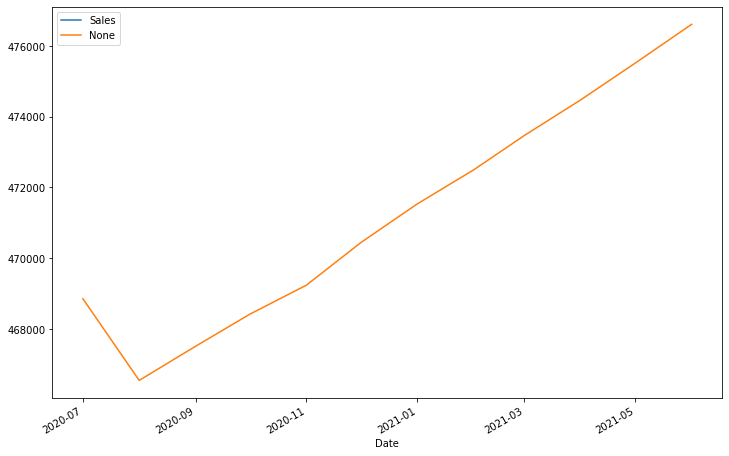

In [311]:
#Closer Just Predictions View for 7/20'-6/21' "Retail Sales"
training['Sales']['2020-07-01':].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)


<AxesSubplot:xlabel='Date'>

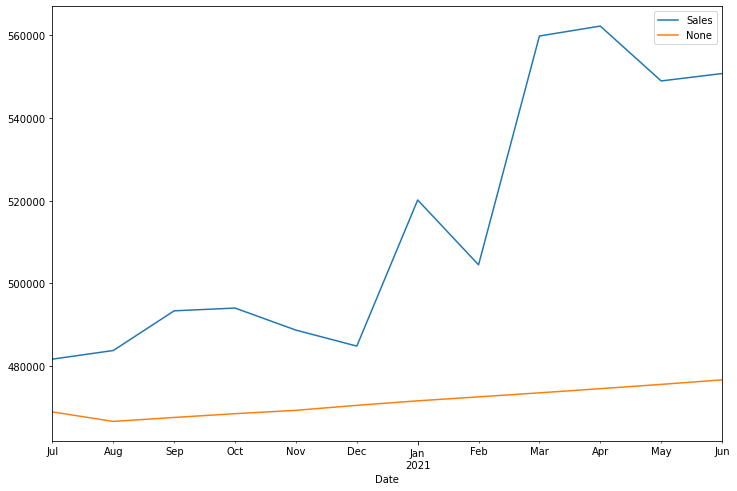

In [312]:
#Actual test Sales with predictions in same time series together, showing predictions much lower than expected.
test.plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [302]:
#Report the RMSE of the model predictions on the test set.
from sklearn.metrics import mean_squared_error

In [299]:
rmse= np.sqrt(mean_squared_error(test['Sales'], predictions))

print('The RMSE for the model test is: ', rmse)

The RMSE for the model test is:  51495.403922120684
